# Analysis Notebook
* Name: Kalie Knecht
* SID: 3035325996
* Email: kalie@berkeley.edu

## Setup

In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
import reverse_geocoder as rg

### Load and View Data

In [2]:
# extract csvs from zip file
zipObj=ZipFile('../data/Dataset_A.zip', 'r')
zipObj.extractall(path='../data/')

In [3]:
# read in csv
daily_global_weather = pd.read_csv('../data/Dataset A/daily_global_weather_2020.csv')
us_air_quality = pd.read_csv('../data/Dataset A/us_air_quality_measures.csv')
greenhouse_gas_type = pd.read_csv('../data/Dataset A/us_greenhouse_gas_emission_direct_emitter_gas_type.csv')
greenhouse_gas_facility = pd.read_csv('../data/Dataset A/us_greenhouse_gas_emissions_direct_emitter_facilities.csv')

/Users/kalie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
daily_global_weather.head(5)

,Unnamed: 0,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP
0,0,AE000041196,2020-01-01,211.0,25.333,55.5170,34.0,0.0
1,1,AEM00041194,2020-01-01,217.0,25.255,55.3640,10.4,0.0
2,2,AFM00040938,2020-01-01,54.0,34.210,62.2280,977.2,23.0
3,3,AG000060611,2020-01-01,71.0,28.050,9.6331,561.0,10.0
4,4,AGE00147708,2020-01-01,99.0,36.720,4.0500,222.0,0.0


In [5]:
us_air_quality.head(5)

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1


In [6]:
greenhouse_gas_type.head(5)

,V_GHG_EMITTER_GAS.ADDRESS1,V_GHG_EMITTER_GAS.ADDRESS2,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.000,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.492500,-88.032300,WI,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,55009.0
1,850 12TH AVE,NaN,NEW YORK,134.500,New York,1000766,CH4,Methane,40.771100,-73.991100,NY,NEW YORK,2018,10019,59th Street,36061.0
2,3379 HWY 482,NaN,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.621528,-93.724774,LA,LOUISIANA,2012,71462,Baker Road Treater,22085.0
3,1012 BEAUCHAMP ST,NaN,GREENVILLE,53562.000,WASHINGTON COUNTY,1003557,CH4,Methane,33.392476,-91.017584,MS,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION,28151.0
4,487 CORN CREEK ROAD,NaN,BEDFORD,7635064.700,Trimble,1006542,CO2,Carbon Dioxide,38.584700,-85.411700,KY,KENTUCKY,2018,40006,Trimble County,21223.0


In [7]:
greenhouse_gas_facility.head(5)

,V_GHG_EMITTER_FACILITIES.ADDRESS1,V_GHG_EMITTER_FACILITIES.ADDRESS2,V_GHG_EMITTER_FACILITIES.CEMS_USED,V_GHG_EMITTER_FACILITIES.CITY,V_GHG_EMITTER_FACILITIES.COUNTY,V_GHG_EMITTER_FACILITIES.COUNTY_FIPS,V_GHG_EMITTER_FACILITIES.FACILITY_ID,V_GHG_EMITTER_FACILITIES.LATITUDE,V_GHG_EMITTER_FACILITIES.LONGITUDE,V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE,...,V_GHG_EMITTER_FACILITIES.STATE_NAME,V_GHG_EMITTER_FACILITIES.YEAR,V_GHG_EMITTER_FACILITIES.ZIP,V_GHG_EMITTER_FACILITIES.FACILITY_NAME,V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE,V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES,V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND,V_GHG_EMITTER_FACILITIES.EPA_VERIFIED,V_GHG_EMITTER_FACILITIES.PARENT_COMPANY,V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR
0,301 Commerce Dr. Suite 3701,NaN,NaN,Fort Worth,NaN,NaN,1008536.0,35.533760,-97.529760,211111.0,...,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,NaN,NaN,N,NaN,CHESAPEAKE ENERGY CORP (100%),NaN
1,449 Shell E&P Court,NaN,NaN,Gibson,TERREBONNE,22109.0,1005071.0,29.628790,-90.917680,211112.0,...,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,NaN,NaN,N,NaN,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,NaN
2,5494 MALONE ROAD,NaN,NaN,MEMPHIS,SHELBY COUNTY,47157.0,1002466.0,34.999213,-89.906724,562212.0,...,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,NaN,NaN,N,NaN,REPUBLIC SERVICES INC (100%),N
3,1601 WEEDON ISLAND DRIVE,NaN,NaN,SAINT PETERSBURG,Pinellas,12103.0,1001489.0,27.861300,-82.601200,221112.0,...,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,NaN,NaN,N,NaN,DUKE ENERGY CORP (100%),Y
4,NaN,NaN,NaN,Rhome,WISE COUNTY,48497.0,1007509.0,33.052600,-97.411400,211112.0,...,TEXAS,2015.0,76078.0,Ross Compressor Station,NaN,NaN,N,NaN,SWG PIPELINE LLC (100%),Y


## Data Sampling and Collection
### How were the data collected?

* The `daily_global_weather` dataframe is measured by weather stations in the Global Historical Climatology Network (GHCN) for January to October 2020. According to the GHCN webiste: "GHCN is an integrated database of climate summaries from land surface stations across the globe that have been subjected to a common suite of quality assurance reviews. The data are obtained from more than 20 sources. Some data are more than 175 years old while others are less than an hour old. GHCN is the official archived dataset, and it serves as a replacement product for older NCEI-maintained datasets that are designated for daily temporal resolution (i.e., DSI 3200, DSI 3201, DSI 3202, DSI 3205, DSI 3206, DSI 3208, DSI 3210, etc.)." The raw data has been altered to include only the average temperature and precipitation measurments from stations that have both measurements. 

* The `greenhouse_gas_type` and `greenhouse_gas_facility` dataframes are reported by the Environmental Protection Agency (EPA) through their Greenhouse Gas Reporting system. This data is reported from large GHG emissions sources, fuel, and industrial gas suppliers, and CO2 injection sites in the United States. Only sources that in general emit 25,000 meric tons or more of CO2 equivalent have to report their data, so anything less than this is not included.
* The `us_air_quality` dataframe is reported by the EPA's Air Quality System (AQS) that measures air quality on a county level from approximately 4000 monitoring stations around the country.


### Was there any potential bias introduced in the sampling process?
* The `daily_global_weather` has 8,514,264 entries, but appears to not have daily entries for each station. The number of entries by station varies from 1 to 296, out of 365.25 days in the year. Additionally, some countries are represented better than others. Out of the 4970 stations we are using data from, the US has 1070 stations, Canada has 890 stations, and Russia has 609 stations. This means that over half of the data is generated from stations in just three countries. The countries after these three with the most monitoring stations are China, with 216 monitoring stations, and Japan, with 142 monitoring stations. Therea are also only stations in 180 countries, when there are 195 countries in the world. This means that there are 15 countries which are not represented at all by the dataset. There are 40 countries which only have 1 station, and 56 countries which have 2 or less monitoring stations. This overrepresentation of some countries relative to others could be a source of bias.
* The `greenhouse_gas_type` and `greenhouse_gas_facility` dataframes only include sources with a large amount of emissions, as discussed above. This means smaller businesses or even those just below the threshold which are emitting a lot are not including. We do not have the total emissions in the United States from this data. 

In [8]:
greenhouse_gas_type.groupby('V_GHG_EMITTER_GAS.GAS_CODE').get_group('Other_Full').head(5)

,V_GHG_EMITTER_GAS.ADDRESS1,V_GHG_EMITTER_GAS.ADDRESS2,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
25,8000 SOUTH FEDERAL WAY,NaN,BOISE,13376.5000,ADA COUNTY,1004325,Other_Full,Other Fully Fluorinated GHGs,43.52680,-116.14490,ID,IDAHO,2017,83707,MICRON TECHNOLOGY INC.,16001.0
405,4321 Jamboree Road,NaN,Newport Beach,3210.0000,ORANGE COUNTY,1010139,Other_Full,Other Fully Fluorinated GHGs,33.66196,-117.85845,CA,CALIFORNIA,2016,92660,Newport Fab LLC (dba TowerJazz),6059.0
781,6501 W. William Cannon Dr.,NaN,Austin,1600.0000,TRAVIS COUNTY,1010067,Other_Full,Other Fully Fluorinated GHGs,30.23680,-97.86504,TX,TEXAS,2019,78735,NXP Semiconductors - OH site,48453.0
846,5 Foden Road,NaN,South Portland,8521.0000,CUMBERLAND COUNTY,1010208,Other_Full,Other Fully Fluorinated GHGs,43.64075,-70.32198,ME,MAINE,2017,4106,Texas Instruments Incorporated - Maine Fab,23005.0
1921,1300 N. Alma School Rd.,NaN,Chandler,3.3194,MARICOPA COUNTY,1010083,Other_Full,Other Fully Fluorinated GHGs,33.32412,-111.85919,AZ,ARIZONA,2012,85224,NXP Semiconductors Chandler Site,4013.0


### Info on raw (uncleaned) data:
The `daily_global_weather` dataframe has the granularity of individual dates for each facility. The columns of the `daily_global_weather` dataframe include:
* `Unamed: 0`: index column (removed in data cleaning)
* `Station`: station ID which appears to have some country code ahead of it
* `Date`: Date of weather data (change to datetime?)
* `TAVG`: Averate temperature in 10s of Celsius
* `Latitude`: latitude of station
* `Longitude`: longitude of station
* `Elevation`: elevation of station
* `PRCP`: precipitation at station on date of data collection

The `greenhouse_gas_type` dataframe has a granularity of individual gases recorded by year for individual facilities that are monitored by the EPA. The columns of `greenhouse_gas_type` include:
* `V_GHG_EMITTER_GAS.ADDRESS1`: address line 1 of emitter facility
* `V_GHG_EMITTER_GAS.ADDRESS2`: address line 2 of emitter facility (sometimes NaN)
* `V_GHG_EMITTER_GAS.CITY`: city of emitter facility
* `V_GHG_EMITTER_GAS.CO2E_EMISSION`: CO2 Equivalent emission of gas (e.g., if the gas is CO2, it lists the amount of CO2, but if it is another gas it lists its CO2 equivalent emission
* `V_GHG_EMITTER_GAS.COUNTY`: county of emitter facility
* `V_GHG_EMITTER_GAS.FACILITY_ID`: facility identification number in the EPA database which identifies facilities, sites, or places subject to environmental regulations or of environmental interest across various EPA programs. 
* `V_GHG_EMITTER_GAS.GAS_CODE`: gas code in row - could be CH4, CO2, N2O, BIOCO2, SF6, HFC, PFC, Other_Full, NF3, Very_Short, HFE, or Other (should match GAS_NAME). Unclear what gas "Other" is
* `V_GHG_EMITTER_GAS.GAS_NAME`: the full name of the gas in the dataframe record (should match GAS_CODE)
* `V_GHG_EMITTER_GAS.LATITUDE`: latitude of emitter facility
* `V_GHG_EMITTER_GAS.LONGITUDE`: longitude of emitter facility
* `V_GHG_EMITTER_GAS.STATE`: state of emitter facility
* `V_GHG_EMITTER_GAS.STATE_NAME`: state of emitter facility
* `V_GHG_EMITTER_GAS.YEAR`: year of emissions data
* `V_GHG_EMITTER_GAS.ZIP`: zip code of emitter facility
* `V_GHG_EMITTER_GAS.FACILITY_NAME`: facility name
* `V_GHG_EMITTER_GAS.COUNTY_FIPS`: ID code for county - should be consistent with county

The columns of `greenhouse_gas_facility` include:
* `V_GHG_EMITTER_FACILITIES.ADDRESS1`: address line 1 of emitter facility
* `V_GHG_EMITTER_FACILITIES.ADDRESS2`: address line 2 of emitter facility (several NaN values)
* `V_GHG_EMITTER_FACILITIES.CEMS_USED`:  (several NaN values)
* `V_GHG_EMITTER_FACILITIES.CITY`: city of emitter facility
* `V_GHG_EMITTER_FACILITIES.COUNTY` county of emitter facility
* `V_GHG_EMITTER_FACILITIES.COUNTY_FIPS`: county code - should be consistent with county
* `V_GHG_EMITTER_FACILITIES.FACILITY_ID`: facility identification number in the EPA database which identifies facilities, sites, or places subject to environmental regulations or of environmental interest across various EPA programs.
* `V_GHG_EMITTER_FACILITIES.LATITUDE`: latitude of emitter facility
* `V_GHG_EMITTER_FACILITIES.LONGITUDE`: longitude of emitter facility
* `V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE`: some identification code ? (some across at least one facility checked)
* `V_GHG_EMITTER_FACILITIES.STATE`: 2 letter state code of emitter facility (should match STATE_NAME)
* `V_GHG_EMITTER_FACILITIES.STATE_NAME`: state of emitter facility (should match STATE)
* `V_GHG_EMITTER_FACILITIES.YEAR`: year of data entry (granularity of data is by year)
* `V_GHG_EMITTER_FACILITIES.ZIP`: zip code of emitter facility (in floating point format)
* `V_GHG_EMITTER_FACILITIES.FACILITY_NAME`: facility name
* `V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE`: some ID code (several NaN values)
* `V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES`: some ID code (several NaN values)
* `V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND`: Y or N (chould change to boolean)
* `V_GHG_EMITTER_FACILITIES.EPA_VERIFIED`: Y or ? (several NaN values)
* `V_GHG_EMITTER_FACILITIES.PARENT_COMPANY`: Parent company of emitter facility
* `V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR`: Y or ? (several NaN values)

In [9]:
#greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.FACILITY_ID'].value_counts()

In [10]:
#greenhouse_gas_facility.groupby('V_GHG_EMITTER_FACILITIES.FACILITY_ID').get_group(1000001.0)

In [11]:
#greenhouse_gas_facility.groupby('V_GHG_EMITTER_FACILITIES.FACILITY_ID').agg('count')

### Info on `daily_global_weather`

In [12]:
daily_global_weather.size

8514264

In [13]:
daily_global_weather['Station'].value_counts().head(5)

USS0013D10S    296
USS0012M17S    296
USS0015F01S    296
CA003073146    296
CA00610FC98    296
Name: Station, dtype: int64

In [14]:
greenhouse_gas_type.head(4)

,V_GHG_EMITTER_GAS.ADDRESS1,V_GHG_EMITTER_GAS.ADDRESS2,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.000,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.492500,-88.032300,WI,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,55009.0
1,850 12TH AVE,NaN,NEW YORK,134.500,New York,1000766,CH4,Methane,40.771100,-73.991100,NY,NEW YORK,2018,10019,59th Street,36061.0
2,3379 HWY 482,NaN,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.621528,-93.724774,LA,LOUISIANA,2012,71462,Baker Road Treater,22085.0
3,1012 BEAUCHAMP ST,NaN,GREENVILLE,53562.000,WASHINGTON COUNTY,1003557,CH4,Methane,33.392476,-91.017584,MS,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION,28151.0


In [15]:
greenhouse_gas_type.groupby(['V_GHG_EMITTER_GAS.GAS_CODE'])[['V_GHG_EMITTER_GAS.CO2E_EMISSION']].agg(sum)

,V_GHG_EMITTER_GAS.CO2E_EMISSION
V_GHG_EMITTER_GAS.GAS_CODE,
BIOCO2,1.518386e+09
CH4,2.156935e+09
CO2,2.826026e+10
HFC,8.194868e+07
HFE,4.355320e+05
N2O,2.738154e+08
NF3,7.896770e+06
Other,4.707912e+05
Other_Full,1.178413e+07


In [16]:
greenhouse_gas_type.groupby(['V_GHG_EMITTER_GAS.YEAR','V_GHG_EMITTER_GAS.GAS_CODE',])[['V_GHG_EMITTER_GAS.CO2E_EMISSION']].agg(sum)

V_GHG_EMITTER_GAS.CO2E_EMISSION
V_GHG_EMITTER_GAS.YEAR V_GHG_EMITTER_GAS.GAS_CODE                                 
2010                   BIOCO2                                         1.538681e+08
                       CH4                                            1.080399e+08
                       CO2                                            3.049345e+09
                       HFC                                            8.034751e+06
                       N2O                                            2.929191e+07
                       PFC                                            1.859915e+06
2011                   BIOCO2                                         1.564392e+08
                       CH4                                            2.353260e+08
                       CO2                                            3.018171e+09
                       HFC                                            1.372832e+07
                       HFE                                            1.688357e+04
                       N2O                                            3.404701e+07
                       NF3                                            1.155088e+06
                       Other                                          4.048567e+04
                       Other_Full                                     1.484069e+06
                       PFC                                            8.302558e+06
                       SF6                                            6.089911e+06
                       Very_Short                                     2.262896e+02
2012                   BIOCO2                                         1.592621e+08
                       CH4                                            2.291970e+08
                       CO2                                            2.886201e+09
                       HFC                                            1.076541e+07
                       HFE                                            1.360390e+04
                       N2O                                            2.788525e+07
                       NF3                                            1.097281e+06
                       Other                                          3.855080e+04
                       Other_Full                                     1.529056e+06
                       PFC                                            7.513708e+06
                       SF6                                            5.023157e+06
                       Very_Short                                     1.650766e+02
...                                                                            ...
2017                   NF3                                            9.827254e+05
                       Other                                          5.926270e+04
                       Other_Full                                     1.005150e+06
                       PFC                                            5.074671e+06
                       SF6                                            4.079198e+06
                       Very_Short                                     4.728791e+03
2018                   BIOCO2                                         1.445725e+08
                       CH4                                            2.288205e+08
                       CO2                                            2.715329e+09
                       HFC                                            5.701639e+06
                       HFE                                            4.439831e+04
                       N2O                                            2.865956e+07
                       NF3                                            7.186280e+05
                       Other                                          9.625780e+04
                       Other_Full                                     1.052462e+06
                       PFC                                         

In [17]:
greenhouse_gas_facility.head(4)

,V_GHG_EMITTER_FACILITIES.ADDRESS1,V_GHG_EMITTER_FACILITIES.ADDRESS2,V_GHG_EMITTER_FACILITIES.CEMS_USED,V_GHG_EMITTER_FACILITIES.CITY,V_GHG_EMITTER_FACILITIES.COUNTY,V_GHG_EMITTER_FACILITIES.COUNTY_FIPS,V_GHG_EMITTER_FACILITIES.FACILITY_ID,V_GHG_EMITTER_FACILITIES.LATITUDE,V_GHG_EMITTER_FACILITIES.LONGITUDE,V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE,...,V_GHG_EMITTER_FACILITIES.STATE_NAME,V_GHG_EMITTER_FACILITIES.YEAR,V_GHG_EMITTER_FACILITIES.ZIP,V_GHG_EMITTER_FACILITIES.FACILITY_NAME,V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE,V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES,V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND,V_GHG_EMITTER_FACILITIES.EPA_VERIFIED,V_GHG_EMITTER_FACILITIES.PARENT_COMPANY,V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR
0,301 Commerce Dr. Suite 3701,NaN,NaN,Fort Worth,NaN,NaN,1008536.0,35.533760,-97.529760,211111.0,...,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,NaN,NaN,N,NaN,CHESAPEAKE ENERGY CORP (100%),NaN
1,449 Shell E&P Court,NaN,NaN,Gibson,TERREBONNE,22109.0,1005071.0,29.628790,-90.917680,211112.0,...,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,NaN,NaN,N,NaN,ENTERPRISE GAS PROCESSING LLC (64.19%); DCP M...,NaN
2,5494 MALONE ROAD,NaN,NaN,MEMPHIS,SHELBY COUNTY,47157.0,1002466.0,34.999213,-89.906724,562212.0,...,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,NaN,NaN,N,NaN,REPUBLIC SERVICES INC (100%),N
3,1601 WEEDON ISLAND DRIVE,NaN,NaN,SAINT PETERSBURG,Pinellas,12103.0,1001489.0,27.861300,-82.601200,221112.0,...,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,NaN,NaN,N,NaN,DUKE ENERGY CORP (100%),Y


## Data Cleaning
`daily_global_weather` 
* What type of data are you currently exploring?
* What is the granularity of the data?
    * This dataframe has data for each station for each day over the time period analyzed. Not each station had data reported for each day.
    * data is reported from 01/01/2020 to 10/22/2020
* What does the distribution of the data look like? Are there any outliers? Are there any missing or invalid entries?

Summary of cleaning done:
* Converted date column to datetime object
* Made a new column for temperature in Celsius units
* added more info about station
    * Country and name returned from providing coordinates to rg.search
* Dropped unecessary indexing column

### Cleaning daily global weather data

In [18]:
def nullcheck(df):
    '''
    Checks for null values in each column of dataframe
    
    Parameters
    ----------
    df: dataframe to check
    
    Returns
    -------
    nullcheck: numpy array with boolean check of null values for each column. has length of column'''
    # initialize
    nullcheck = np.full(len(df.columns),False,dtype=bool)
    
    for i in range(0,len(df.columns)):
        colname = df.columns[i]
        nullcheck[i] = df[colname].isnull().values.any()
    return nullcheck

In [19]:
# dates of data reported
ave_dates = daily_global_weather.groupby('Date').agg(np.mean)
ave_dates.reset_index(inplace=True)
print('Date Range: ',ave_dates['Date'][0],ave_dates['Date'].iloc[-1])

Date Range:  2020-01-01 2020-10-22


In [20]:
# convert dates to datetime objects
daily_global_weather['Date'] = pd.to_datetime(daily_global_weather['Date'])

In [21]:
# Make a new column for temperature data in Celsius units
daily_global_weather['T_C'] = daily_global_weather['TAVG']/10

In [22]:
# Check countries represented by data

# organize data by stations
stations = daily_global_weather.groupby(['Station']).agg('min')[['Latitude','Longitude']]
stations['Lat , Lon']=list(zip(stations.Latitude,stations.Longitude))
stations.reset_index(inplace=True)

# extract coordinates of each station to a list of tuples
#coords = list(stations.itertuples(index=False,name=None))
coords = stations['Lat , Lon'].to_list()

# use reverese_geocoder to return info about each lat and lon
results = rg.search(coords)
# put results into dataframe
results_df=pd.DataFrame(results)

# Add results to station dataframe
stations = stations.join(results_df) 
#stations.head(5)

Loading formatted geocoded file...


In [23]:
# Check number of stations in each country
stations['cc'].value_counts().head(5)

US    1070
CA     890
RU     609
CN     216
JP     142
Name: cc, dtype: int64

In [24]:
# Check number of stations in each country
only_one=stations['cc'].value_counts() == 1
two_or_less=stations['cc'].value_counts() <= 2
three_or_less=stations['cc'].value_counts() <= 3
four_or_less=stations['cc'].value_counts() <= 4

print('0 stations: ',15,
      '\n1 station: ',only_one.sum(),
      '\n1 or less stations: ',15+only_one.sum(),
      '\n2 or less stations: ',two_or_less.sum(),
      '\n3 or less stations: ',three_or_less.sum(),
      '\n4 or less stations: ',four_or_less.sum())

0 stations:  15 
1 station:  40 
1 or less stations:  55 
2 or less stations:  56 
3 or less stations:  68 
4 or less stations:  81


In [25]:
# Add more info about each station
station_info=stations.copy()
# drop unecessary columns
station_info.drop(['Latitude', 'Longitude', 'Lat , Lon', 'lat', 'lon'],axis=1,inplace=True)
station_info.set_index('Station')
daily_global_weather=daily_global_weather.merge(station_info,on='Station')

In [26]:
# drop legacy index column
daily_global_weather.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
daily_global_weather.head(5)

,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP,T_C,name,admin1,admin2,cc
0,AE000041196,2020-01-01,211.0,25.333,55.517,34.0,0.0,21.1,Sharjah,Ash Shariqah,,AE
1,AE000041196,2020-01-02,214.0,25.333,55.517,34.0,0.0,21.4,Sharjah,Ash Shariqah,,AE
2,AE000041196,2020-01-03,212.0,25.333,55.517,34.0,0.0,21.2,Sharjah,Ash Shariqah,,AE
3,AE000041196,2020-01-04,219.0,25.333,55.517,34.0,0.0,21.9,Sharjah,Ash Shariqah,,AE
4,AE000041196,2020-01-05,237.0,25.333,55.517,34.0,0.0,23.7,Sharjah,Ash Shariqah,,AE


In [28]:
# check for NaNs
nullvals = nullcheck(daily_global_weather)
nullvals

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [29]:
US_results_df = results_df[results_df['cc'] == 'US']
US_results_df.columns[nullcheck(US_results_df)]

Index([], dtype='object')

In [30]:
US_results_df.head(5)

,lat,lon,name,admin1,admin2,cc
414,48.98538,-123.07797,Point Roberts,Washington,Whatcom County,US
415,48.98538,-123.07797,Point Roberts,Washington,Whatcom County,US
420,48.10667,-123.37172,Port Angeles East,Washington,Clallam County,US
466,55.47639,-133.14833,Craig,Alaska,Annette Island Reserve,US
467,55.47639,-133.14833,Craig,Alaska,Annette Island Reserve,US


In [31]:
daily_global_weather.head(5)

,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP,T_C,name,admin1,admin2,cc
0,AE000041196,2020-01-01,211.0,25.333,55.517,34.0,0.0,21.1,Sharjah,Ash Shariqah,,AE
1,AE000041196,2020-01-02,214.0,25.333,55.517,34.0,0.0,21.4,Sharjah,Ash Shariqah,,AE
2,AE000041196,2020-01-03,212.0,25.333,55.517,34.0,0.0,21.2,Sharjah,Ash Shariqah,,AE
3,AE000041196,2020-01-04,219.0,25.333,55.517,34.0,0.0,21.9,Sharjah,Ash Shariqah,,AE
4,AE000041196,2020-01-05,237.0,25.333,55.517,34.0,0.0,23.7,Sharjah,Ash Shariqah,,AE


### Cleaning greenhouse gas data
`greenhouse_gas_facility`

The data in the `greenhouse_gas_facility` dataframe contained missing values in each column and a few invalid entries. These were handled during the data cleaning process. 

* `V_GHG_EMITTER_FACILITIES.ADDRESS2` contained all NaN values, except for two entries which contained NaN values in all of the other columns, except for ADDRESS1, which was DEPARTMENT OF ENVIRONMENTAL HEALTH  SUITE 310. These two rows were removed from the dataset as errenous values. After removing these errenous values, the `V_GHG_EMITTER_FACILITIES.ADDRESS2` column was removed from the `greenhouse_gas_facility` dataframe.
* `V_GHG_EMITTER_FACILITIES.CEMS_USED` contained only NaN values, so it was removed from the dataframe.
* `V_GHG_EMITTER_FACILITIES.COUNTY` and `V_GHG_EMITTER_FACILITIES.COUNTY_FIPS` contain similar information, and both contain NaN values
    * There were inconsistencies in the `V_GHG_EMITTER_FACILITIES.COUNTY` values across counties, so each of the values were converted to uppercase, and the word 'county' was removed from any entries which contained it. 
    * `V_GHG_EMITTER_FACILITIES.COUNTY_FIPS`, `V_GHG_EMITTER_FACILITIES.CITY`, and `V_GHG_EMITTER_FACILITIES.ZIP` were used to define the NaN values in `V_GHG_EMITTER_FACILITIES.COUNTY`
    * Around 187 values were left NaN after this
* `V_GHG_EMITTER_FACILITIES.PARENT_COMPANY`, `V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE`, `V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE`, `V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES`,  `V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND`, and `V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR` were dropped because they are not needed for analysis of the research question.
* `V_GHG_EMITTER_FACILITIES.STATE_NAME` was dropped because it contains the same information as `V_GHG_EMITTER_FACILITIES.STATE`,
* `V_GHG_EMITTER_FACILITIES.EPA_VERIFIED` contained 'Y' and NaN values, so the NaN values were filled as 'N'
* `V_GHG_EMITTER_FACILITIES.LATITUDE` and `V_GHG_EMITTER_FACILITIES.LONGITUDE` had several NaN values, which were filled based on a map from other entries using overlap in `V_GHG_EMITTER_FACILITIES.ZIP`, `V_GHG_EMITTER_FACILITIES.CITY`, `V_GHG_EMITTER_FACILITIES.COUNTY`, and `V_GHG_EMITTER_FACILITIES.STATE` (in that order). This removed all null values, but means that many of the coordinates are approximations rather than actual values. The coordinates are all at least within the same state, which is assumed to be good enough for this analysis.
* The columns were renamed to shorter names that are more consistent with the `greenhouse_gas_type` dataframe

In [32]:
# check for cols with null values
nullvals = nullcheck(greenhouse_gas_facility)
greenhouse_gas_facility.columns[nullvals]

Index(['V_GHG_EMITTER_FACILITIES.ADDRESS1',
       'V_GHG_EMITTER_FACILITIES.ADDRESS2',
       'V_GHG_EMITTER_FACILITIES.CEMS_USED', 'V_GHG_EMITTER_FACILITIES.CITY',
       'V_GHG_EMITTER_FACILITIES.COUNTY',
       'V_GHG_EMITTER_FACILITIES.COUNTY_FIPS',
       'V_GHG_EMITTER_FACILITIES.FACILITY_ID',
       'V_GHG_EMITTER_FACILITIES.LATITUDE',
       'V_GHG_EMITTER_FACILITIES.LONGITUDE',
       'V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE',
       'V_GHG_EMITTER_FACILITIES.STATE', 'V_GHG_EMITTER_FACILITIES.STATE_NAME',
       'V_GHG_EMITTER_FACILITIES.YEAR', 'V_GHG_EMITTER_FACILITIES.ZIP',
       'V_GHG_EMITTER_FACILITIES.FACILITY_NAME',
       'V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE',
       'V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES',
       'V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND',
       'V_GHG_EMITTER_FACILITIES.EPA_VERIFIED',
       'V_GHG_EMITTER_FACILITIES.PARENT_COMPANY',
       'V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR'],
      dtype='object')

In [33]:
# Remove entries from dataframe which contain DEPARTMENT OF ENVIRONMENTAL HEALTH SUITE 310 in ADDRESS1

# data exploration
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.ADDRESS1'].value_counts()
greenhouse_gas_facility.groupby('V_GHG_EMITTER_FACILITIES.ADDRESS2').get_group('Y')
greenhouse_gas_facility.groupby('V_GHG_EMITTER_FACILITIES.ADDRESS2').get_group('N')
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.ADDRESS1'].iloc[51585]

# construct mask
mask1 = greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.ADDRESS1'] == 'DEPARTMENT OF ENVIRONMENTAL HEALTH  SUITE 310 (100%)'
# show that these rows do not contain useful information
greenhouse_gas_facility[mask1]

# remove from dataset
greenhouse_gas_facility = greenhouse_gas_facility[~mask1]

# show that the only two values that were in this column were removed in previous cell
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.ADDRESS2'].value_counts()

# Drop now uneccessary column 
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.ADDRESS2',axis=1,inplace=True)

In [34]:
# Drop 'V_GHG_EMITTER_FACILITIES.CEMS_USED' due to it being an empty colummn
# check if empty
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.CEMS_USED'].value_counts()
# Drop now uneccessary column 
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.CEMS_USED',axis=1,inplace=True)

# Drop more uneeded columns
#Dropping company name
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.PARENT_COMPANY',axis=1,inplace=True)

# Dropping STATE_NAME (keeping STATE)
#greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.STATE',axis=1,inplace=True)

# drop NAICS code
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE',axis=1,inplace=True)

# Dropping secondary NAICS code
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE',axis=1,inplace=True)

# drop addditional naics code
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES',axis=1,inplace=True)

#  drop COGENERATION_UNIT_EMISS_IND 
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND',axis=1,inplace=True)

# drop PLANT_CODE_INDICATOR
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR',axis=1,inplace=True)

In [35]:
# clean county column
# convert to capitals
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.COUNTY'] = greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.COUNTY'].str.upper()
# remove county from name
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.COUNTY'] = greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.COUNTY'].str.replace(' COUNTY','')

In [36]:
def find_county(df):
    '''
    Helper function to find county in rows with NaN values
    
    Note: to construct co_map properly, the initial dataframe with null values
    must be passed
    
    Parameters
    ----------
    df: dataframe with column to be cleaned
    
    Returns
    -------
    df: original df with cleaned county data
    '''
    # 1. based on county_fips
    # define county map
    co_map = df[['V_GHG_EMITTER_FACILITIES.COUNTY_FIPS','V_GHG_EMITTER_FACILITIES.COUNTY']].groupby('V_GHG_EMITTER_FACILITIES.COUNTY_FIPS').first(dropna=True)
    co_map = co_map.squeeze().to_dict()
    
    # construct mask of NaN values
    nullmask = df['V_GHG_EMITTER_FACILITIES.COUNTY'].isnull()
    
    # grab city name as county name
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY_FIPS']
    
    # convert city name to county based on map - will leave unmapped values as NaN
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'].map(co_map)
    
    # 2. based on city
    # define county map
    co_map = df[['V_GHG_EMITTER_FACILITIES.CITY','V_GHG_EMITTER_FACILITIES.COUNTY']].groupby('V_GHG_EMITTER_FACILITIES.CITY').first(dropna=True)
    co_map = co_map.squeeze().to_dict()
    
    # construct mask of NaN values
    nullmask = df['V_GHG_EMITTER_FACILITIES.COUNTY'].isnull()
    
    # grab city name as county name
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.CITY']
    
    # convert city name to county based on map - will leave unmapped values as NaN
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'].map(co_map)
    
    # 3. based on zip
    # define county map
    co_map = df[['V_GHG_EMITTER_FACILITIES.ZIP','V_GHG_EMITTER_FACILITIES.COUNTY']].groupby('V_GHG_EMITTER_FACILITIES.ZIP').first(dropna=True)
    co_map = co_map.squeeze().to_dict()
    
    # construct mask of NaN values
    nullmask = df['V_GHG_EMITTER_FACILITIES.COUNTY'].isnull()
    
    # grab city name as county name
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.ZIP']
    
    # convert city name to county based on map - will leave unmapped values as NaN
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY'].map(co_map)
    
    
    return df

In [37]:
greenhouse_gas_facility  = find_county(greenhouse_gas_facility)

In [38]:
# check remaining null values
nullmask=greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.COUNTY'].isnull()
# number null county values left
print(nullmask.sum())
greenhouse_gas_facility[nullmask].head(5)

187


,V_GHG_EMITTER_FACILITIES.ADDRESS1,V_GHG_EMITTER_FACILITIES.CITY,V_GHG_EMITTER_FACILITIES.COUNTY,V_GHG_EMITTER_FACILITIES.COUNTY_FIPS,V_GHG_EMITTER_FACILITIES.FACILITY_ID,V_GHG_EMITTER_FACILITIES.LATITUDE,V_GHG_EMITTER_FACILITIES.LONGITUDE,V_GHG_EMITTER_FACILITIES.STATE,V_GHG_EMITTER_FACILITIES.STATE_NAME,V_GHG_EMITTER_FACILITIES.YEAR,V_GHG_EMITTER_FACILITIES.ZIP,V_GHG_EMITTER_FACILITIES.FACILITY_NAME,V_GHG_EMITTER_FACILITIES.EPA_VERIFIED
1158,28615 Pathfinder Rd,Anchor Point,NaN,NaN,1012893.0,59.872671,-151.550481,AK,ALASKA,2019.0,99556.0,BlueCrest Alaska - 820 Cook Inlet Basin,NaN
1188,333 Ravenswood Avenue Bldg U,Menlo Park,NaN,NaN,1012095.0,37.457419,-122.176154,CA,CALIFORNIA,2017.0,94025.0,SRI International Cogeneration Project,NaN
1599,County Road 20,Angus,NaN,NaN,1004012.0,48.081098,-96.711873,MN,MINNESOTA,2019.0,56712.0,VGT CS 2204,NaN
1656,1277 CR 3020,Crockett,NaN,NaN,1012815.0,31.281604,-95.519739,TX,TEXAS,2017.0,75835.0,Alamo Gas Plant,NaN
1748,County Road 179,Marion Junction,NaN,NaN,1009727.0,32.433391,-87.329508,AL,ALABAMA,2018.0,36759.0,TRANSCO STATION 95,NaN


In [39]:
# Can now drop FIPS column (no more useful info)
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.COUNTY_FIPS',axis=1,inplace=True)

In [40]:
# EPA verified
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.EPA_VERIFIED'].value_counts()
# only values are Y, so fill N/A with N
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.EPA_VERIFIED'].fillna('N',inplace=True)
# check value counts
greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.EPA_VERIFIED'].value_counts()

N    69087
Y     8017
Name: V_GHG_EMITTER_FACILITIES.EPA_VERIFIED, dtype: int64

In [41]:
def find_coords(df):
    '''
    Helper function to find Lat and Lonin rows with NaN values
    
    Note: to construct co_map properly, the initial dataframe with null values
    must be passed
    
    Parameters
    ----------
    df: dataframe with column to be cleaned
    
    Returns
    -------
    df: original df with cleaned zip code data data
    '''
    # 1. Based on zip code
    # define lat and lon map
    lat_map = df[['V_GHG_EMITTER_FACILITIES.ZIP','V_GHG_EMITTER_FACILITIES.LATITUDE']].groupby('V_GHG_EMITTER_FACILITIES.ZIP').first(dropna=True)
    lon_map = df[['V_GHG_EMITTER_FACILITIES.ZIP','V_GHG_EMITTER_FACILITIES.LONGITUDE']].groupby('V_GHG_EMITTER_FACILITIES.ZIP').first(dropna=True)
    lat_map = lat_map.squeeze().to_dict()
    lon_map = lon_map.squeeze().to_dict()
    
    # construct mask of NaN values
    nullmask = df['V_GHG_EMITTER_FACILITIES.LATITUDE'].isnull()
    
    # grab zip as lat and long
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.ZIP']
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.ZIP']
    
    # convert zip to lat and lon based on map
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'].map(lat_map)
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'].map(lon_map)
    
    # 2. based on city
    # make map based on city
    lat_map = df[['V_GHG_EMITTER_FACILITIES.CITY','V_GHG_EMITTER_FACILITIES.LATITUDE']].groupby('V_GHG_EMITTER_FACILITIES.CITY').first(dropna=True)
    lon_map = df[['V_GHG_EMITTER_FACILITIES.CITY','V_GHG_EMITTER_FACILITIES.LONGITUDE']].groupby('V_GHG_EMITTER_FACILITIES.CITY').first(dropna=True)
    lat_map = lat_map.squeeze().to_dict()
    lon_map = lon_map.squeeze().to_dict()
    
    # remaining mask for NaN values
    nullmask = df['V_GHG_EMITTER_FACILITIES.LATITUDE'].isnull()
    
    # grab city as lat and long
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.CITY']
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.CITY']
    
    # assign based on city
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'].map(lat_map)
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'].map(lon_map)
    
    # 3. based on county
    # make map based on counties
    lat_map = df[['V_GHG_EMITTER_FACILITIES.COUNTY','V_GHG_EMITTER_FACILITIES.LATITUDE']].groupby('V_GHG_EMITTER_FACILITIES.COUNTY').first(dropna=True)
    lon_map = df[['V_GHG_EMITTER_FACILITIES.COUNTY','V_GHG_EMITTER_FACILITIES.LONGITUDE']].groupby('V_GHG_EMITTER_FACILITIES.COUNTY').first(dropna=True)
    lat_map = lat_map.squeeze().to_dict()
    lon_map = lon_map.squeeze().to_dict()
    
    # remaining mask for NaN values
    nullmask = df['V_GHG_EMITTER_FACILITIES.LATITUDE'].isnull()
    
    # grab zip as lat and long
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY']
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.COUNTY']
    
    # assign based on county 
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'].map(lat_map)
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'].map(lon_map)
    
    # 4. based on state
    # make map based on states
    lat_map = df[['V_GHG_EMITTER_FACILITIES.STATE','V_GHG_EMITTER_FACILITIES.LATITUDE']].groupby('V_GHG_EMITTER_FACILITIES.STATE').first(dropna=True)
    lon_map = df[['V_GHG_EMITTER_FACILITIES.STATE','V_GHG_EMITTER_FACILITIES.LONGITUDE']].groupby('V_GHG_EMITTER_FACILITIES.STATE').first(dropna=True)
    lat_map = lat_map.squeeze().to_dict()
    lon_map = lon_map.squeeze().to_dict()
    
    # remaining mask for NaN values
    nullmask = df['V_GHG_EMITTER_FACILITIES.LATITUDE'].isnull()
    
    # grab state as lat and long
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.STATE']
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.STATE']
    
    # assign based on county 
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LATITUDE'].map(lat_map)
    df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_FACILITIES.LONGITUDE'].map(lon_map)
    
    return df

In [42]:
# clean lat and lon
greenhouse_gas_facility = find_coords(greenhouse_gas_facility)

In [43]:
nullmask = greenhouse_gas_facility['V_GHG_EMITTER_FACILITIES.LATITUDE'].isnull()
print(nullmask.sum())
greenhouse_gas_facility[nullmask].head(5)

0


,V_GHG_EMITTER_FACILITIES.ADDRESS1,V_GHG_EMITTER_FACILITIES.CITY,V_GHG_EMITTER_FACILITIES.COUNTY,V_GHG_EMITTER_FACILITIES.FACILITY_ID,V_GHG_EMITTER_FACILITIES.LATITUDE,V_GHG_EMITTER_FACILITIES.LONGITUDE,V_GHG_EMITTER_FACILITIES.STATE,V_GHG_EMITTER_FACILITIES.STATE_NAME,V_GHG_EMITTER_FACILITIES.YEAR,V_GHG_EMITTER_FACILITIES.ZIP,V_GHG_EMITTER_FACILITIES.FACILITY_NAME,V_GHG_EMITTER_FACILITIES.EPA_VERIFIED


In [44]:
# check for cols with null values
nullvals = nullcheck(greenhouse_gas_facility)
greenhouse_gas_facility.columns[nullvals]

Index(['V_GHG_EMITTER_FACILITIES.ADDRESS1', 'V_GHG_EMITTER_FACILITIES.COUNTY'], dtype='object')

In [45]:
greenhouse_gas_facility.drop('V_GHG_EMITTER_FACILITIES.STATE',axis=1,inplace=True)

In [46]:
column_rename_dict = {'V_GHG_EMITTER_FACILITIES.ADDRESS1': 'Address',
                      'V_GHG_EMITTER_FACILITIES.CITY': 'City',
                      'V_GHG_EMITTER_FACILITIES.COUNTY': 'County',
                      'V_GHG_EMITTER_FACILITIES.FACILITY_ID': 'Facility_ID',
                      'V_GHG_EMITTER_FACILITIES.LATITUDE': 'Latitude',
                      'V_GHG_EMITTER_FACILITIES.LONGITUDE':'Longitude',
                      'V_GHG_EMITTER_FACILITIES.STATE_NAME':'State',
                      'V_GHG_EMITTER_FACILITIES.YEAR':'Year',
                      'V_GHG_EMITTER_FACILITIES.ZIP':'Zip',
                      'V_GHG_EMITTER_FACILITIES.FACILITY_NAME':'Facility_Name',
                      'V_GHG_EMITTER_FACILITIES.EPA_VERIFIED':'EPA_Verified'
                     }
greenhouse_gas_facility.rename(column_rename_dict,axis=1,inplace=True)

In [47]:
greenhouse_gas_facility.head(5)

,Address,City,County,Facility_ID,Latitude,Longitude,State,Year,Zip,Facility_Name,EPA_Verified
0,301 Commerce Dr. Suite 3701,Fort Worth,TARRANT,1008536.0,35.5338,-97.5298,TEXAS,2012.0,76102.0,TEP Barnett USA LLC 415 - Strawn Basin,N
1,449 Shell E&P Court,Gibson,TERREBONNE,1005071.0,29.6288,-90.9177,LOUISIANA,2011.0,70358.0,North Terrebonne Gas Plant,N
2,5494 MALONE ROAD,MEMPHIS,SHELBY,1002466.0,34.9992,-89.9067,TENNESSEE,2017.0,38116.0,SOUTH SHELBY LANDFILL,N
3,1601 WEEDON ISLAND DRIVE,SAINT PETERSBURG,PINELLAS,1001489.0,27.8613,-82.6012,FLORIDA,2015.0,33702.0,P L Bartow Power Plant,N
4,NaN,Rhome,WISE,1007509.0,33.0526,-97.4114,TEXAS,2015.0,76078.0,Ross Compressor Station,N


In [48]:
# convert all Y/N to booleans

### Cleaning greenhouse gas data
`greenhouse_gas_type`

The data in the `greenhouse_gas_type` dataframe contained missing values in several columns. 

* The address data is not used to analyze the research quesiton, so `V_GHG_EMITTER_GAS.ADDRESS1` and `V_GHG_EMITTER_GAS.ADDRESS2` were dropped.
* The `V_GHG_EMITTER_GAS.COUNTY` column contained inconsistently formatted values and several NaN entries
    * These were cleaned in the same way as the `greenhouse_gas_facility` dataframe, with 504 remaining NaN entries in the end.
    * `V_GHG_EMITTER_GAS.COUNTY_FIPS` dropped after this cleaning as it is no longer needed
* `V_GHG_EMITTER_GAS.LATITUDE` and `V_GHG_EMITTER_GAS.LONGITUDE` contained NaN values, so they were filled in the same method as the `greenhouse_gas_facility` dataframe 


In [49]:
greenhouse_gas_type.columns

Index(['V_GHG_EMITTER_GAS.ADDRESS1', 'V_GHG_EMITTER_GAS.ADDRESS2',
       'V_GHG_EMITTER_GAS.CITY', 'V_GHG_EMITTER_GAS.CO2E_EMISSION',
       'V_GHG_EMITTER_GAS.COUNTY', 'V_GHG_EMITTER_GAS.FACILITY_ID',
       'V_GHG_EMITTER_GAS.GAS_CODE', 'V_GHG_EMITTER_GAS.GAS_NAME',
       'V_GHG_EMITTER_GAS.LATITUDE', 'V_GHG_EMITTER_GAS.LONGITUDE',
       'V_GHG_EMITTER_GAS.STATE', 'V_GHG_EMITTER_GAS.STATE_NAME',
       'V_GHG_EMITTER_GAS.YEAR', 'V_GHG_EMITTER_GAS.ZIP',
       'V_GHG_EMITTER_GAS.FACILITY_NAME', 'V_GHG_EMITTER_GAS.COUNTY_FIPS'],
      dtype='object')

In [50]:
# check for cols with null values
nullvals = nullcheck(greenhouse_gas_type)
greenhouse_gas_type.columns[nullvals]

Index(['V_GHG_EMITTER_GAS.ADDRESS1', 'V_GHG_EMITTER_GAS.ADDRESS2',
       'V_GHG_EMITTER_GAS.COUNTY', 'V_GHG_EMITTER_GAS.LATITUDE',
       'V_GHG_EMITTER_GAS.LONGITUDE', 'V_GHG_EMITTER_GAS.COUNTY_FIPS'],
      dtype='object')

In [51]:
# drop addresses
greenhouse_gas_type.drop('V_GHG_EMITTER_GAS.ADDRESS1',axis=1,inplace=True)
greenhouse_gas_type.drop('V_GHG_EMITTER_GAS.ADDRESS2',axis=1,inplace=True)

In [52]:
# check for cols with null values
nullvals = nullcheck(greenhouse_gas_type)
greenhouse_gas_type.columns[nullvals]

Index(['V_GHG_EMITTER_GAS.COUNTY', 'V_GHG_EMITTER_GAS.LATITUDE',
       'V_GHG_EMITTER_GAS.LONGITUDE', 'V_GHG_EMITTER_GAS.COUNTY_FIPS'],
      dtype='object')

In [53]:
# clean county column
# convert to capitals
greenhouse_gas_type['V_GHG_EMITTER_GAS.COUNTY'] = greenhouse_gas_type['V_GHG_EMITTER_GAS.COUNTY'].str.upper()
# remove county from name
greenhouse_gas_type['V_GHG_EMITTER_GAS.COUNTY'] = greenhouse_gas_type['V_GHG_EMITTER_GAS.COUNTY'].str.replace(' COUNTY','')

In [54]:
def find_county_gas(df):
    '''
    Helper function to find county in rows with NaN values
    
    Note: to construct co_map properly, the initial dataframe with null values
    must be passed
    
    Parameters
    ----------
    df: dataframe with column to be cleaned
    
    Returns
    -------
    df: original df with cleaned county data
    '''
    # 1. based on county_fips
    # define county map
    co_map = df[['V_GHG_EMITTER_GAS.COUNTY_FIPS','V_GHG_EMITTER_GAS.COUNTY']].groupby('V_GHG_EMITTER_GAS.COUNTY_FIPS').first(dropna=True)
    co_map = co_map.squeeze().to_dict()
    
    # construct mask of NaN values
    nullmask = df['V_GHG_EMITTER_GAS.COUNTY'].isnull()
    
    # grab city name as county name
    df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY_FIPS']
    
    # convert city name to county based on map - will leave unmapped values as NaN
    df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'].map(co_map)
    
    # 2. based on city
    # define county map
    co_map = df[['V_GHG_EMITTER_GAS.CITY','V_GHG_EMITTER_GAS.COUNTY']].groupby('V_GHG_EMITTER_GAS.CITY').first(dropna=True)
    co_map = co_map.squeeze().to_dict()
    
    # construct mask of NaN values
    nullmask = df['V_GHG_EMITTER_GAS.COUNTY'].isnull()
    
    # grab city name as county name
    df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.CITY']
    
    # convert city name to county based on map - will leave unmapped values as NaN
    df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'].map(co_map)
    
    # 3. based on zip
    # define county map
    co_map = df[['V_GHG_EMITTER_GAS.ZIP','V_GHG_EMITTER_GAS.COUNTY']].groupby('V_GHG_EMITTER_GAS.ZIP').first(dropna=True)
    co_map = co_map.squeeze().to_dict()
    
    # construct mask of NaN values
    nullmask = df['V_GHG_EMITTER_GAS.COUNTY'].isnull()
    
    # grab city name as county name
    df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.ZIP']
    
    # convert city name to county based on map - will leave unmapped values as NaN
    df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY'].map(co_map)
    
    
    return df

In [55]:
greenhouse_gas_type = find_county_gas(greenhouse_gas_type)

In [56]:
nullmask = greenhouse_gas_type['V_GHG_EMITTER_GAS.COUNTY'].isnull()
print(nullmask.sum())
greenhouse_gas_type[nullmask].head(5)

504


,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
776,Falcon Heights,18.476,NaN,1011893,N2O,Nitrous Oxide,26.566265,-99.115180,TX,TEXAS,2018,78545,KMTP Bob West Dew Point Plant Falcon Heights TX,NaN
789,Cranberry Township,1.192,NaN,1008673,N2O,Nitrous Oxide,40.716450,-80.120526,PA,PENNSYLVANIA,2019,16066,EXCO Resources (PA) LLC - Basin 160A,NaN
803,Reform,7634.000,NaN,1010480,CH4,Methane,33.359700,-88.018000,AL,ALABAMA,2017,35481,SNG Station 4140 Reform AL,NaN
804,Starbuck,23.244,NaN,1012641,N2O,Nitrous Oxide,46.518584,-118.127378,WA,WASHINGTON,2017,99359,Gas Transmission Northwest Starbuck Sta.#7 (St...,NaN
1035,Cranberry Township,34446.000,NaN,1008673,CH4,Methane,40.716450,-80.120526,PA,PENNSYLVANIA,2012,16066,EXCO Resources (PA) LLC - Basin 160A,NaN


In [57]:
# can drop COUNTY_FIPS now
greenhouse_gas_type.drop('V_GHG_EMITTER_GAS.COUNTY_FIPS',axis=1,inplace=True)

In [58]:
def find_coords_gas(df):
    '''
    Helper function to find Lat and Lonin rows with NaN values
    
    Note: to construct co_map properly, the initial dataframe with null values
    must be passed
    
    Parameters
    ----------
    df: dataframe with column to be cleaned
    
    Returns
    -------
    df: original df with cleaned zip code data data
    '''
    # 1. Based on zip code
    # define lat and lon map
    lat_map = df[['V_GHG_EMITTER_GAS.ZIP','V_GHG_EMITTER_GAS.LATITUDE']].groupby('V_GHG_EMITTER_GAS.ZIP').first(dropna=True)
    lon_map = df[['V_GHG_EMITTER_GAS.ZIP','V_GHG_EMITTER_GAS.LONGITUDE']].groupby('V_GHG_EMITTER_GAS.ZIP').first(dropna=True)
    lat_map = lat_map.squeeze().to_dict()
    lon_map = lon_map.squeeze().to_dict()
    
    # construct mask of NaN values
    nullmask = df['V_GHG_EMITTER_GAS.LATITUDE'].isnull()
    
    # grab zip as lat and long
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.ZIP']
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.ZIP']
    
    # convert zip to lat and lon based on map
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'].map(lat_map)
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'].map(lon_map)
    
    # 2. based on city
    # make map based on city
    lat_map = df[['V_GHG_EMITTER_GAS.CITY','V_GHG_EMITTER_GAS.LATITUDE']].groupby('V_GHG_EMITTER_GAS.CITY').first(dropna=True)
    lon_map = df[['V_GHG_EMITTER_GAS.CITY','V_GHG_EMITTER_GAS.LONGITUDE']].groupby('V_GHG_EMITTER_GAS.CITY').first(dropna=True)
    lat_map = lat_map.squeeze().to_dict()
    lon_map = lon_map.squeeze().to_dict()
    
    # remaining mask for NaN values
    nullmask = df['V_GHG_EMITTER_GAS.LATITUDE'].isnull()
    
    # grab city as lat and long
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.CITY']
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.CITY']
    
    # assign based on city
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'].map(lat_map)
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'].map(lon_map)
    
    # 3. based on county
    # make map based on counties
    lat_map = df[['V_GHG_EMITTER_GAS.COUNTY','V_GHG_EMITTER_GAS.LATITUDE']].groupby('V_GHG_EMITTER_GAS.COUNTY').first(dropna=True)
    lon_map = df[['V_GHG_EMITTER_GAS.COUNTY','V_GHG_EMITTER_GAS.LONGITUDE']].groupby('V_GHG_EMITTER_GAS.COUNTY').first(dropna=True)
    lat_map = lat_map.squeeze().to_dict()
    lon_map = lon_map.squeeze().to_dict()
    
    # remaining mask for NaN values
    nullmask = df['V_GHG_EMITTER_GAS.LATITUDE'].isnull()
    
    # grab zip as lat and long
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY']
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.COUNTY']
    
    # assign based on county 
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'].map(lat_map)
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'].map(lon_map)
    
    # 4. based on state
    # make map based on states
    lat_map = df[['V_GHG_EMITTER_GAS.STATE','V_GHG_EMITTER_GAS.LATITUDE']].groupby('V_GHG_EMITTER_GAS.STATE').first(dropna=True)
    lon_map = df[['V_GHG_EMITTER_GAS.STATE','V_GHG_EMITTER_GAS.LONGITUDE']].groupby('V_GHG_EMITTER_GAS.STATE').first(dropna=True)
    lat_map = lat_map.squeeze().to_dict()
    lon_map = lon_map.squeeze().to_dict()
    
    # remaining mask for NaN values
    nullmask = df['V_GHG_EMITTER_GAS.LATITUDE'].isnull()
    
    # grab state as lat and long
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.STATE']
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.STATE']
    
    # assign based on county 
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.LATITUDE'].map(lat_map)
    df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'] = df.loc[nullmask,'V_GHG_EMITTER_GAS.LONGITUDE'].map(lon_map)
    
    return df

In [59]:
# clean lat and lon
greenhouse_gas_type = find_coords_gas(greenhouse_gas_type)

In [60]:
# clean latitude and longitude
nullmask = greenhouse_gas_type['V_GHG_EMITTER_GAS.LATITUDE'].isnull()
greenhouse_gas_type[nullmask].head(5)

,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME


In [61]:
# check for cols with null values
nullvals = nullcheck(greenhouse_gas_type)
greenhouse_gas_type.columns[nullvals]

Index(['V_GHG_EMITTER_GAS.COUNTY'], dtype='object')

In [62]:
greenhouse_gas_type.columns

Index(['V_GHG_EMITTER_GAS.CITY', 'V_GHG_EMITTER_GAS.CO2E_EMISSION',
       'V_GHG_EMITTER_GAS.COUNTY', 'V_GHG_EMITTER_GAS.FACILITY_ID',
       'V_GHG_EMITTER_GAS.GAS_CODE', 'V_GHG_EMITTER_GAS.GAS_NAME',
       'V_GHG_EMITTER_GAS.LATITUDE', 'V_GHG_EMITTER_GAS.LONGITUDE',
       'V_GHG_EMITTER_GAS.STATE', 'V_GHG_EMITTER_GAS.STATE_NAME',
       'V_GHG_EMITTER_GAS.YEAR', 'V_GHG_EMITTER_GAS.ZIP',
       'V_GHG_EMITTER_GAS.FACILITY_NAME'],
      dtype='object')

In [63]:
# drop unnecessary columns
greenhouse_gas_type.drop('V_GHG_EMITTER_GAS.STATE',axis=1,inplace=True)

In [64]:
column_rename_dict = {'V_GHG_EMITTER_GAS.CITY': 'City',
                      'V_GHG_EMITTER_GAS.CO2E_EMISSION': 'CO2E_Emission',
                      'V_GHG_EMITTER_GAS.COUNTY': 'County',
                      'V_GHG_EMITTER_GAS.FACILITY_ID': 'Facility_ID',
                      'V_GHG_EMITTER_GAS.GAS_CODE': 'Gas_Code',
                      'V_GHG_EMITTER_GAS.GAS_NAME': 'Gas_Name',
                      'V_GHG_EMITTER_GAS.LATITUDE': 'Latitude',
                      'V_GHG_EMITTER_GAS.LONGITUDE':'Longitude',
                      'V_GHG_EMITTER_GAS.STATE_NAME':'State',
                      'V_GHG_EMITTER_GAS.YEAR':'Year',
                      'V_GHG_EMITTER_GAS.ZIP':'Zip',
                      'V_GHG_EMITTER_GAS.FACILITY_NAME':'Facility_Name',
                     }
greenhouse_gas_type.rename(column_rename_dict,axis=1,inplace=True)

In [65]:
greenhouse_gas_type.head(5)

,City,CO2E_Emission,County,Facility_ID,Gas_Code,Gas_Name,Latitude,Longitude,State,Year,Zip,Facility_Name
0,GREEN BAY,58024.000,BROWN,1000589,BIOCO2,Biogenic CO2,44.4925,-88.0323,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC
1,NEW YORK,134.500,NEW YORK,1000766,CH4,Methane,40.7711,-73.9911,NEW YORK,2018,10019,59th Street
2,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.6215,-93.7248,LOUISIANA,2012,71462,Baker Road Treater
3,GREENVILLE,53562.000,WASHINGTON,1003557,CH4,Methane,33.3925,-91.0176,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION
4,BEDFORD,7635064.700,TRIMBLE,1006542,CO2,Carbon Dioxide,38.5847,-85.4117,KENTUCKY,2018,40006,Trimble County


## Exploratory Data Analysis
* Is there any correlation between the variables you are interested in exploring?
    * I am interested in exploring the average temperature vs the lattitude (e.g. what is the temperature as you get further north or south of the equator).
* How would you cleanly and accurately visualize the relationship among variables?

In [66]:
daily_global_weather.head(5)

,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP,T_C,name,admin1,admin2,cc
0,AE000041196,2020-01-01,211.0,25.333,55.517,34.0,0.0,21.1,Sharjah,Ash Shariqah,,AE
1,AE000041196,2020-01-02,214.0,25.333,55.517,34.0,0.0,21.4,Sharjah,Ash Shariqah,,AE
2,AE000041196,2020-01-03,212.0,25.333,55.517,34.0,0.0,21.2,Sharjah,Ash Shariqah,,AE
3,AE000041196,2020-01-04,219.0,25.333,55.517,34.0,0.0,21.9,Sharjah,Ash Shariqah,,AE
4,AE000041196,2020-01-05,237.0,25.333,55.517,34.0,0.0,23.7,Sharjah,Ash Shariqah,,AE


In [67]:
pt = pd.pivot_table(daily_global_weather,index='Date',values=['T_C','TAVG'],aggfunc=np.sum)

In [68]:
daily_ave_weather = daily_global_weather.groupby('Date').agg('mean')

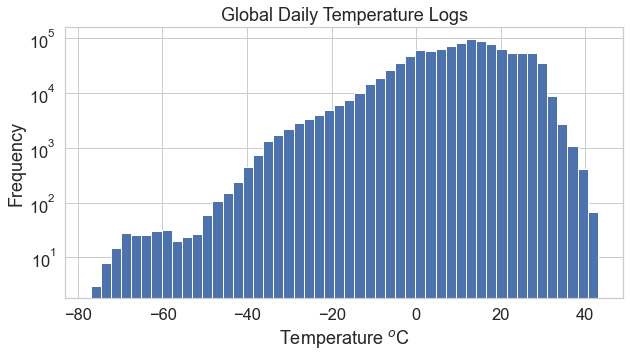

In [69]:
plt.figure(figsize=(10,5))
plt.hist(daily_global_weather['T_C'],bins=50,range=(-77,43),log=True)
plt.title('Global Daily Temperature Logs')
plt.xlabel('Temperature $^o$C')
plt.ylabel('Frequency')
plt.savefig('../figures/DailyTempHist.png',bbox_inches = 'tight',pad_inches=0.5)
plt.show()

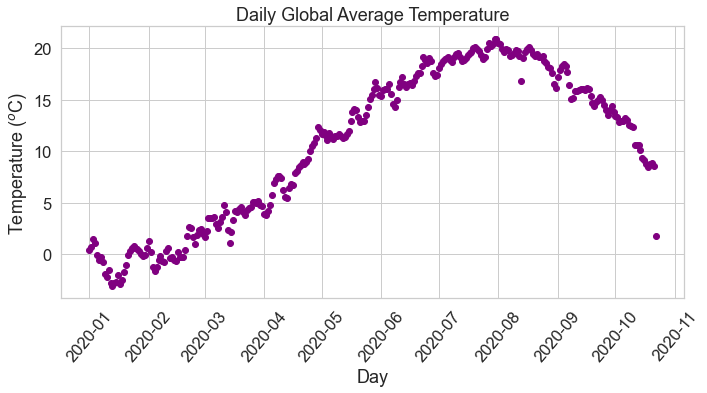

In [70]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
# temp in 10s of Celsius
ax.scatter(daily_ave_weather.index.values,
        daily_ave_weather['T_C'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day",
       ylabel="Temperature ($^o$C)",
       title="Daily Global Average Temperature")
plt.tight_layout()
#plt.xticks(np.arange(0,300,10),rotation=50)
plt.xticks(rotation=50)
plt.savefig('../figures/DailyAveTemp.png',bbox_inches = 'tight',pad_inches=0.5)
plt.show()
# note this plot is misleading because of heavy samping in US

In [71]:
# cut to just US weather
USmask = daily_global_weather['cc']=='US'
daily_US_weather = daily_global_weather[USmask]

In [72]:
ave_US_weather = daily_US_weather[['Date','T_C']].groupby('Date').agg(np.mean)

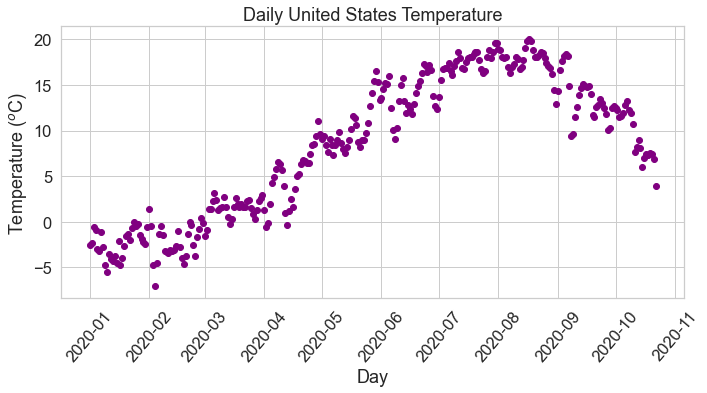

In [73]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
# temp in 10s of Celsius
ax.scatter(ave_US_weather.index.values,
        ave_US_weather['T_C'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day",
       ylabel="Temperature ($^o$C)",
       title="Daily United States Temperature")
plt.tight_layout()
#plt.xticks(np.arange(0,300,10),rotation=50)
plt.xticks(rotation=50)
plt.savefig('../figures/DailyAveUSTemp.png',bbox_inches = 'tight',pad_inches=0.5)
plt.show()

In [74]:
mean_weather_lat = daily_US_weather[['Latitude','T_C']].groupby('Latitude').agg(np.mean)

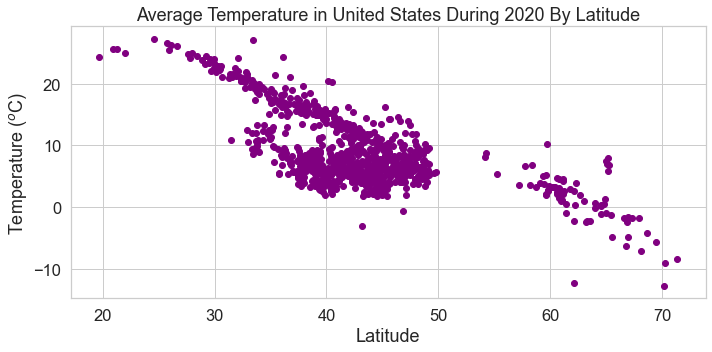

In [75]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
ax.scatter(mean_weather_lat.index.values,
        mean_weather_lat['T_C'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Latitude",
       ylabel="Temperature ($^o$C)",
       title="Average Temperature in United States During 2020 By Latitude")
plt.tight_layout()
#plt.xticks(np.arange(0,300,20),rotation=50)
plt.savefig('../figures/USLatTemp.png',bbox_inches = 'tight',pad_inches=0.5)
plt.show()

In [76]:
mean_weather_lon = daily_US_weather[['Longitude','T_C']].groupby('Longitude').agg(np.mean)

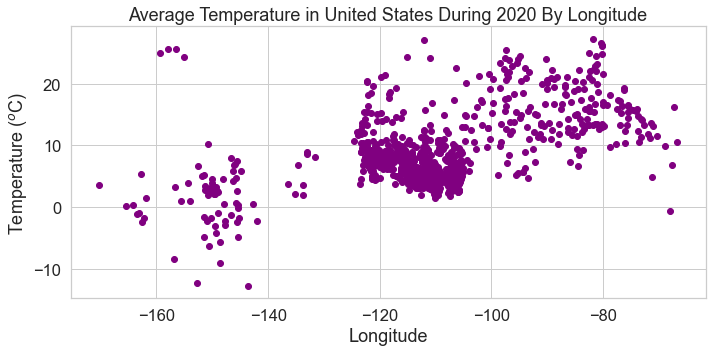

In [156]:
# expect to not rally see a relationship
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
ax.scatter(mean_weather_lon.index.values,
        mean_weather_lon['T_C'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Longitude",
       ylabel="Temperature ($^o$C)",
       title="Average Temperature in United States During 2020 By Longitude")
plt.tight_layout()
#plt.xticks(np.arange(0,300,20),rotation=50)
plt.savefig('../figures/USLonTemp.png',bbox_inches = 'tight',pad_inches=0.5)
plt.show()

In [78]:
greenhouse_gas_type.head(5)

,City,CO2E_Emission,County,Facility_ID,Gas_Code,Gas_Name,Latitude,Longitude,State,Year,Zip,Facility_Name
0,GREEN BAY,58024.000,BROWN,1000589,BIOCO2,Biogenic CO2,44.4925,-88.0323,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC
1,NEW YORK,134.500,NEW YORK,1000766,CH4,Methane,40.7711,-73.9911,NEW YORK,2018,10019,59th Street
2,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.6215,-93.7248,LOUISIANA,2012,71462,Baker Road Treater
3,GREENVILLE,53562.000,WASHINGTON,1003557,CH4,Methane,33.3925,-91.0176,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION
4,BEDFORD,7635064.700,TRIMBLE,1006542,CO2,Carbon Dioxide,38.5847,-85.4117,KENTUCKY,2018,40006,Trimble County


In [144]:
greenhouse_gas_type['Year'].value_counts()

2014    23424
2015    23202
2013    22847
2012    22513
2018    22202
2016    22166
2019    22048
2017    21882
2011    21876
2010    17768
Name: Year, dtype: int64

In [79]:
state_emissions = greenhouse_gas_type[['State','CO2E_Emission']].groupby('State').agg(np.sum)
state_emissions.reset_index(inplace=True)
state_emissions.head(5)

In [82]:
rename_col = {'admin1': 'State',
              'admin2': 'County'
             }
daily_US_weather.rename(rename_col,axis=1,inplace=True)

/Users/kalie/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [83]:
ave_2020_US_weather = daily_US_weather[['State','T_C']].groupby('State').agg(np.mean)
ave_2020_US_weather.reset_index(inplace=True)
ave_2020_US_weather['State'] = ave_2020_US_weather['State'].str.upper()
ave_2020_US_weather.head(5)

In [88]:
state_emissions['State'] = state_emissions['State'].astype(str)
ave_2020_US_weather['State'] = ave_2020_US_weather['State'].astype(str)
temp_and_emissions = state_emissions.merge(ave_2020_US_weather,on='State')
temp_and_emissions.head(5)

,State,CO2E_Emission,T_C
0,ALABAMA,1.115769e+09,19.956259
1,ALASKA,1.989846e+08,1.404130
2,ARIZONA,5.785678e+08,12.408973
3,ARKANSAS,5.064893e+08,17.384746
4,CALIFORNIA,1.139769e+09,11.918771


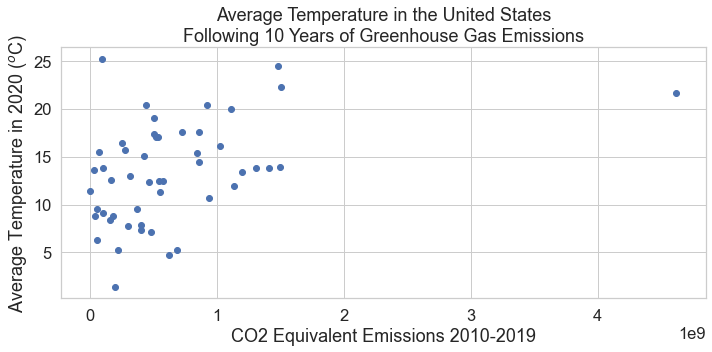

In [148]:
# expect to not rally see a relationship
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
ax.scatter(temp_and_emissions['CO2E_Emission'],
        temp_and_emissions['T_C'],
        color='b')

# Set title and labels for axes
ax.set(xlabel="CO2 Equivalent Emissions 2010-2019",
       ylabel="Average Temperature in 2020 ($^o$C)",
       title="Average Temperature in the United States\nFollowing 10 Years of Greenhouse Gas Emissions")
plt.tight_layout()
#plt.xticks(np.arange(0,300,20),rotation=50)
plt.savefig('../figures/emissions_temp.png',bbox_inches = 'tight',pad_inches=0.5)
plt.show()

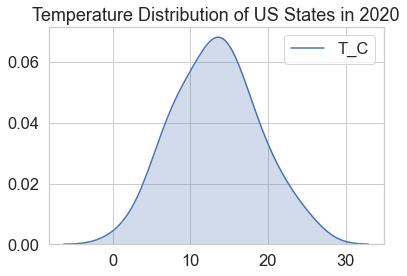

In [149]:
plt.figure()
sns.kdeplot(temp_and_emissions['T_C'],shade=True)
plt.title('Temperature Distribution of US States in 2020')
plt.savefig('../figures/tempkde.png',bbox_inches = 'tight',pad_inches=0.5)

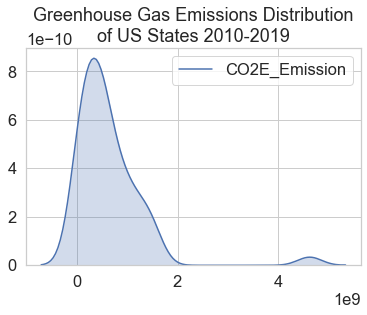

In [151]:
plt.figure()
sns.kdeplot(temp_and_emissions['CO2E_Emission'],shade=True)

plt.title('Greenhouse Gas Emissions Distribution\nof US States 2010-2019')
plt.savefig('../figures/emissionskde.png',bbox_inches = 'tight',pad_inches=0.5)

<Figure size 432x288 with 0 Axes>

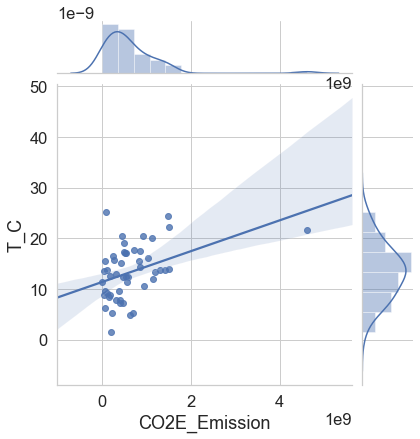

In [152]:
plt.figure()
sns.jointplot('CO2E_Emission','T_C',data=temp_and_emissions,kind='reg')
#plt.xlabel('CO2 Equivalent Emissions')
#plt.ylabel('Temperature ($^o$C)')
#plt.title('Distribution of CO2 Equivalent Emissions\nand Temperature in the United States')
#plt.savefig('../figures/emissionvtregjointplot.png')
plt.savefig('../figures/emissionvtregjointplot.png',bbox_inches = 'tight',pad_inches=0.5)
plt.show()

In [157]:
daily_US_weather.head(5)

,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP,T_C,name,State,County,cc
51489,CA001017099,2020-01-01,73.0,48.7833,-123.1333,178.0,0.0,7.3,Point Roberts,Washington,Whatcom County,US
51490,CA001017099,2020-01-02,40.0,48.7833,-123.1333,178.0,65.0,4.0,Point Roberts,Washington,Whatcom County,US
51491,CA001017099,2020-01-03,80.0,48.7833,-123.1333,178.0,118.0,8.0,Point Roberts,Washington,Whatcom County,US
51492,CA001017099,2020-01-04,51.0,48.7833,-123.1333,178.0,27.0,5.1,Point Roberts,Washington,Whatcom County,US
51493,CA001017099,2020-01-05,52.0,48.7833,-123.1333,178.0,7.0,5.2,Point Roberts,Washington,Whatcom County,US


In [159]:
greenhouse_gas_type.head(5)

,City,CO2E_Emission,County,Facility_ID,Gas_Code,Gas_Name,Latitude,Longitude,State,Year,Zip,Facility_Name
0,GREEN BAY,58024.000,BROWN,1000589,BIOCO2,Biogenic CO2,44.4925,-88.0323,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC
1,NEW YORK,134.500,NEW YORK,1000766,CH4,Methane,40.7711,-73.9911,NEW YORK,2018,10019,59th Street
2,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.6215,-93.7248,LOUISIANA,2012,71462,Baker Road Treater
3,GREENVILLE,53562.000,WASHINGTON,1003557,CH4,Methane,33.3925,-91.0176,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION
4,BEDFORD,7635064.700,TRIMBLE,1006542,CO2,Carbon Dioxide,38.5847,-85.4117,KENTUCKY,2018,40006,Trimble County


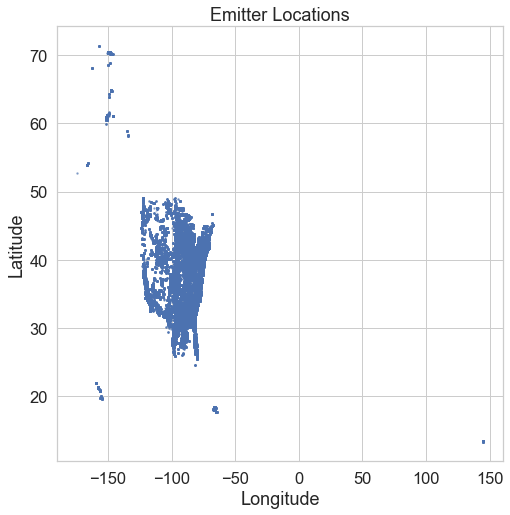

In [162]:
def pickup_scatter(t):
    plt.scatter(t['Longitude'], t['Latitude'], s=2, alpha=0.2)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Emitter Locations')
    
plt.figure(figsize=(8, 8))
pickup_scatter(greenhouse_gas_type)

In [171]:
daily_US_weather.head(5)

,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP,T_C,name,State,County,cc
51489,CA001017099,2020-01-01,73.0,48.7833,-123.1333,178.0,0.0,7.3,Point Roberts,Washington,Whatcom County,US
51490,CA001017099,2020-01-02,40.0,48.7833,-123.1333,178.0,65.0,4.0,Point Roberts,Washington,Whatcom County,US
51491,CA001017099,2020-01-03,80.0,48.7833,-123.1333,178.0,118.0,8.0,Point Roberts,Washington,Whatcom County,US
51492,CA001017099,2020-01-04,51.0,48.7833,-123.1333,178.0,27.0,5.1,Point Roberts,Washington,Whatcom County,US
51493,CA001017099,2020-01-05,52.0,48.7833,-123.1333,178.0,7.0,5.2,Point Roberts,Washington,Whatcom County,US


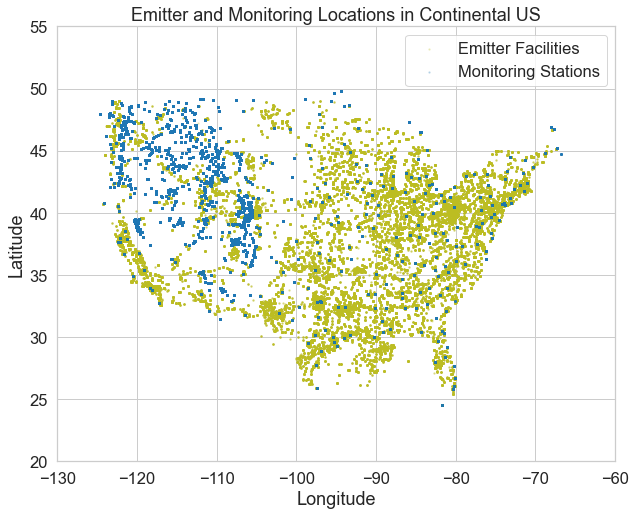

In [191]:
plt.figure(figsize=(10, 8))
plt.scatter( greenhouse_gas_type['Longitude'],greenhouse_gas_type['Latitude'],s=2, alpha=0.2,color='tab:olive',label='Emitter Facilities')
plt.scatter( daily_US_weather['Longitude'],daily_US_weather['Latitude'],s=2, alpha=0.2,color='tab:blue',label='Monitoring Stations')
plt.xlim(-130,-60)
plt.ylim(20,55)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Emitter and Monitoring Locations in Continental US')
plt.savefig('../figures/datamap.png',bbox_inches = 'tight',pad_inches=0.5)
plt.show()

## Data Modeling and Inferences
* Please note that the following datasets have a data modeling requirement, i.e. you need to utilize at least 1 machine learning model we teach in this class in your project (my dataset is included in list)
* Here are a few components your notebook must address:
    * What type of machine learning problem are you investigating?
    * What model do you plan on using and why?
    * Does your model require hyperparameter tuning? If so, how do you approach it?
    * How do you engineer the features for your model? What are the rationales behind selecting these features?
    * How do you perform cross validation on your model?
    * What loss metrics are you using to evaluate your model?
    * From a bias-variance tradeoff standpoint, how do you assess the performance of your model? How do you check if it is overfitting?
    * How would you improve your model based on the outcome?
* If you are choosing to pursue your research question from an inference angle, your notebook must demonstrate sufficient analysis and visualization to support your conclusion. We will not restrict you to the type of analysis as there are many different statistical techniques that may apply to your case. However, we also ask that you provide detailed justification for the techniques you choose and how it allows you make those inferences.

In [192]:
import sklearn.linear_model as lm

/Users/kalie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/kalie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='la

In [213]:
X_train = temp_and_emissions['CO2E_Emission'].iloc[:-35].to_numpy()
Y_train = temp_and_emissions['T_C'].iloc[:-35].to_numpy()
X_test = temp_and_emissions['CO2E_Emission'].iloc[-35:].to_numpy()
Y_test = temp_and_emissions['T_C'][-35:].to_numpy()

In [225]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


In [222]:
model = lm.LinearRegression(fit_intercept = True)


model.fit(X_train, Y_train);

In [223]:
model.coef_

array([3.83524578e-09])

In [227]:
model.intercept_

11.632453647799956

In [226]:
Y_pred = model.predict(X_test)

$ T_C = 11.623 + 3.835 \times 10^{-9} \text{ CO2E_Emission} $

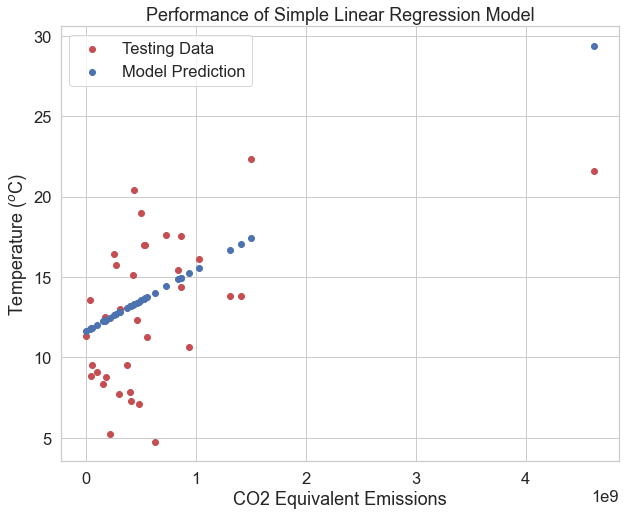

In [235]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,Y_test,color='r',label='Testing Data')
plt.scatter(X_test,Y_pred,color='b',label='Model Prediction')
plt.title('Performance of Simple Linear Regression Model')
plt.legend()
plt.xlabel('CO2 Equivalent Emissions')
plt.ylabel('Temperature ($^o$C)')
plt.savefig('../figures/modeloutcome.png')

In [237]:
model.

TypeError: score() missing 2 required positional arguments: 'X' and 'y'